In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import font_manager as fm
from matplotlib.ticker import ScalarFormatter
# Path to your local font file
# font_path = 'C:/Windows/Fonts//'
# Load the font
# font_prop = fm.FontProperties(fname=font_path)
# plt.rcParams['font.family'] = font_prop.get_name()

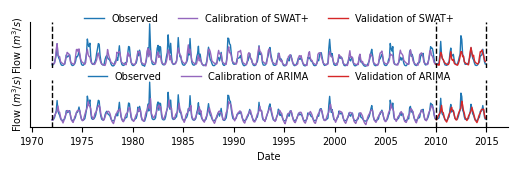

In [2]:
obs = pd.read_csv('../data/tangnaihai_natural_monthly_flow.csv', parse_dates=['date'], index_col='date')
# select the data from 1972 to 2009
obs = obs['1972-01-01':'2014-12-31']
# sort the data by month
obs = obs.sort_index(ascending=True)

pred = pd.read_csv('../result/SWATPlusCalValSimData/Channel_3_Monthly_River-Flow_Tangnaihai_Sim1972_2019.csv', parse_dates=['Date'], index_col='Date')
pred = pred['1972-01-01':'2014-12-31']
pred = pred.sort_index(ascending=True)
arima = pd.read_csv('../result/ARIMAPredData/seasonal_decompose_additive_arima_train_sim_tangnaihai_before_2015.csv', parse_dates=['date'], index_col='date')
arima = arima['1972-01-01':'2014-12-31']

df_new = pd.DataFrame({'Date': obs.index, 'Observed': obs['flow(m^3/s)'].values, 'Simulated': pred['Value'].values, 'ARIMA': arima['SimFlow(m^3/s)'].values})
df_new.set_index('Date', inplace=True)
font_size = 7
line_width = 1

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5.0, 1.5), sharex=True)

# SWAT+ 子图
ax1.plot(df_new['Observed'], color='tab:blue', label='Observed', linewidth=line_width)
ax1.plot(df_new.loc['1972-01-01':'2009-12-31','Simulated'], color='tab:purple', label='Calibration of SWAT+', linewidth=line_width)
ax1.plot(df_new.loc['2009-12-31':'2014-12-31','Simulated'], color='tab:red', label='Validation of SWAT+', linewidth=line_width)
ax1.axvline(x=pd.to_datetime('1972-01-01'), color='black', linestyle='--', linewidth=line_width)
ax1.axvline(x=pd.to_datetime('2009-12-31'), color='black', linestyle='--', linewidth=line_width)
ax1.axvline(x=pd.to_datetime('2014-12-31'), color='black', linestyle='--', linewidth=line_width)
ax1.set_ylabel('Flow ($m^3/s$)', fontsize=font_size)
# change font size of scientific notation on y-axis
ax1.yaxis.get_offset_text().set_fontsize(font_size)
# close the upper and right spines
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
# invisible the ticks on x-axis
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax1.tick_params(axis='y', labelsize=font_size)
ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax1.legend(fontsize=font_size, frameon=False, ncol=3, bbox_to_anchor=(0.5, 1.07), loc='center')
ax1.tick_params(axis='both', which='major', labelsize=font_size)

# invisible the ticks on y-axis
ax1.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)

# ARIMA 子图
ax2.plot(df_new['Observed'], color='tab:blue', label='Observed', linewidth=line_width)
ax2.plot(df_new.loc['1972-01-01':'2009-12-31','ARIMA'], color='tab:purple', label='Calibration of ARIMA', linewidth=line_width)
ax2.plot(df_new.loc['2009-12-31':'2014-12-31','ARIMA'], color='tab:red', label='Validation of ARIMA', linewidth=line_width)
ax2.axvline(x=pd.to_datetime('1972-01-01'), color='black', linestyle='--', linewidth=line_width)
ax2.axvline(x=pd.to_datetime('2009-12-31'), color='black', linestyle='--', linewidth=line_width)
ax2.axvline(x=pd.to_datetime('2014-12-31'), color='black', linestyle='--', linewidth=line_width)
ax2.set_xlabel('Date', fontsize=font_size)
ax2.set_ylabel('Flow ($m^3/s$)', fontsize=font_size)
ax2.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax2.yaxis.get_offset_text().set_fontsize(font_size)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)
# ax2.spines['bottom'].set_visible(False)
ax2.legend(fontsize=font_size, frameon=False, ncol=3, bbox_to_anchor=(0.5, 1.07), loc='center')
ax2.tick_params(axis='both', which='major', labelsize=font_size)

plt.subplots_adjust(hspace=0.25, top=0.92, bottom=0.22, left=0.035, right=0.99)
plt.savefig('../figs/Observed_Simulated_Flow_Tangnaihai_minmap.eps', format='eps', dpi=1000, transparent=True)
plt.savefig('../figs/Observed_Simulated_Flow_Tangnaihai_minmap.png', format='PNG', dpi=300, transparent=True)
plt.show()



The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Empty DataFrame
Columns: [SWATPlus, ARIMA]
Index: []


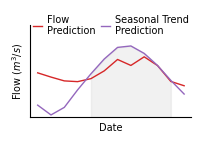

In [41]:
df_swatplus = pd.read_csv('../result/SWATPlusPredUsingSimYearData/Channel_3_Monthly_River-Flow_TNH_pred2016.csv',parse_dates=['Date'],index_col='Date')
df_swatplus = df_swatplus['2016-01-01':'2016-12-31']

df_arima = pd.read_csv('../result/ARIMAPredData/seasonal_decompose_additive_arima_pred_tangnaihai_2015_2019.csv',parse_dates=['date'],index_col='date')
df_arima = df_arima['2016-01-01':'2016-12-31']
df_swatplus
font_size = 7
line_width = 1

# 设置日期索引
# 创建新的数据框
df_new = pd.DataFrame({
    'Date': df_swatplus.index,
    'SWATPlus': df_swatplus['Value'].values,
    'ARIMA': df_arima['flow(m^3/s)'].values
})

# 设置日期索引
df_new.set_index('Date', inplace=True)

print(df_new.loc['2016-05-01':'2016-11-30'])

plt.figure(figsize=(1.8, 1.2))
plt.plot(df_new.index, df_new['SWATPlus'], label='Flow\nPrediction', color='tab:red', linewidth=line_width)
plt.plot(df_new.index, df_new['ARIMA'], label='Seasonal Trend\nPrediction', color='tab:purple', linewidth=line_width)

# 添加浅灰色填充
plt.fill_between(df_new.index[4:11], -500, df_new['ARIMA'].values[4:11], color='lightgray', alpha=0.3)

# 设置x轴和y轴标签
plt.xlabel('Date', fontsize=font_size)
plt.ylabel('Flow ($m^3/s$)', fontsize=font_size)

# 设置刻度标签大小
plt.tick_params(axis='both', which='major', labelsize=font_size)

# 设置y轴为科学计数法
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.gca().yaxis.get_offset_text().set_fontsize(font_size)

# Set ylim
plt.ylim([-300,1400])

# 移除顶部和右侧边框
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.gca().tick_params(axis='y', which='both', left=False, right=False, labelleft=False)
plt.gca().tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

# 添加图例
plt.legend(fontsize=font_size, frameon=False, ncol=2, loc='upper center', bbox_to_anchor=(0.5, 1.22),handlelength=1.0,
           handletextpad=0.5,
           borderaxespad=0.5,
           borderpad=0.5,
           labelspacing=0.5,
           columnspacing=0.5)  # Added columnspacing parameter to reduce horizontal distance between labels

# 调整布局
plt.subplots_adjust(hspace=0.25, top=0.88, bottom=0.11, left=0.095, right=0.99)

# 保存图片
plt.savefig('../figs/Flow_Trend_Prediction_2016_minimap.eps', format='eps', dpi=1000, transparent=True)
plt.savefig('../figs/Flow_Trend_Prediction_2016_minimap.png', format='PNG', dpi=300, transparent=True)

plt.show()
# 